In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import re
import math
import datetime
from collections import OrderedDict
from itertools import repeat
import warnings
warnings.filterwarnings('ignore')

from konlpy.tag import Okt ;t = Okt()
from konlpy.tag import Kkma ; kkma=Kkma()
from nltk import FreqDist
from konlpy.tag import *

In [2]:
from hanspell import spell_checker

ModuleNotFoundError: No module named 'hanspell'

In [21]:
import datetime
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

In [22]:
def top3():
    df=pd.read_csv('bluehouse_ver3.csv')
    df_up = df[(df['start']<'2020-01-31')&(df['start']>='2020-01-24')] # 24일~30일 데이터 신규
    df_join_sort = df_up.sort_values(by='votes', ascending=False) # vote 순 정렬
    top = df_join_sort[['article_id','category','title','content','votes','end']] # 카테고리, 제목, 내용, 투표수, 마감일
    top3= top.iloc[:3,:]

    new_registered_petition = list(top['article_id'])
    new_registered_votes = list(top3['votes'])
    new_registered_title = list(top3['title'])
    new_registered_end = list(top3['end'])
    new_registered_content = list(top3['content'])
    return new_registered_petition, new_registered_title, new_registered_end, new_registered_votes, new_registered_content

In [23]:
url,title,end,votes,contents=top3()

In [24]:
def keyword():
    print("\n\n\n\n1월 마지막 주 국민의 울림\n\n\n",)


    #===================================================== 금주의 키워드 ============================================================

    df = pd.read_csv('bluehouse_ver3.csv', delimiter=',') # 데이터 읽어오기
    df1=df # df1에 복사
    df_wordcloud = df1[(df1['start']>='2020-01-24')&(df1['start']<'2020-01-31')] # 전 주에 올라온 청원만 긁어서 저장
    cloud_nouns = df_wordcloud['title'].tolist() # df_Wordcloud['title]을 리스트로 저장

    cn_text= str(cloud_nouns) # title을 str타입으로
    tokens_ko = t.nouns(cn_text) # title에서 명사 추출
    stopwords = ['전','등','사','구','사','의','관','의율','률','좀','의','수','공','과','짓','간','목','온','철','도','처','검',
                '것','사','직','앗','더','간','폐','귀','유','초','범','이제','우리','위','때','즉시','대한','청원','제발','요구']

    tokens_ko = [i for i in tokens_ko if i not in stopwords] # 불용어 제거
    ko= nltk.Text(tokens_ko) # tokens_ko를 편리하게 탐색하고자 nltk.Text 객체로 선언

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() # 폰트 매니저로 폰트 지정
    rc('font', family=font_name) # 폰트 지정

    data = ko.vocab().most_common() # ko를 빈도순으로 data에 저장
    tmp_data = dict(data) # 딕셔너리 타입으로 저장
    bluehouse_mask = np.array(Image.open("koreapen.png")) # 한반도 모양으로 wordcloud 그릴 예정
    image_colors = ImageColorGenerator(bluehouse_mask) # wordcloud 색깔은 이미지 색깔로!

    wordcloud = WordCloud(font_path = 'c:/windows/Fonts/malgun.ttf',mask=bluehouse_mask, background_color='white',max_words=30).generate_from_frequencies(tmp_data) # 빈도순으로 워드클라우드 생성!
    plt.figure(figsize=(16,24)) # 16x24 사이즈로 그릴 예정
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = 'bilinear') # 워드 클라우드 표시
    plt.axis('off') # 축 제거
    plt.show() # Show!
    print("                                                     <국민청원 키워드 top 30>\n\n\n") # 그림 설명
    return df
# =================================================== 전 주 대비 급상승 top3 ====================================================
# 기사 나가는 날짜는 1월 31일
def top3():
    df=pd.read_csv('bluehouse_ver3.csv')
    df_up = df[(df['start']<'2020-01-31')&(df['start']>='2020-01-24')] # 24일~30일 데이터 신규
    df_join_sort = df_up.sort_values(by='votes', ascending=False) # vote 순 정렬
    top = df_join_sort[['article_id','category','title','content','votes','end']] # 카테고리, 제목, 내용, 투표수, 마감일
    top3= top.iloc[:3,:]

    new_registered_petition = list(top['article_id'])
    new_registered_votes = list(top3['votes'])
    new_registered_title = list(top3['title'])
    new_registered_end = list(top3['end'])
    return new_registered_petition, new_registered_title, new_registered_end, new_registered_votes
# ============================================ 마감 임박 청원 top3 ( 200000표 미만) =============================================
def dead_top3():
    df=pd.read_csv('bluehouse_ver3.csv')
    df_dead = df[(df['end']<'2020-02-07')&(df['end']>='2020-01-31')] # 1월 31일~ 2월 6일 마감 데이터 
    df_deadline = df_dead[['category','title','content','votes','end']] # 카테고리 제목 내용 투표수 마감일 
    df_dead_sort = df_deadline.sort_values(by='votes',ascending=False) # 투표순 정렬
    df_dead_sort=df_dead_sort[df_dead_sort['votes']<200000] # 20만표 미만만
    df_dead_top3 = df_dead_sort.iloc[:3,:]
    end_day = list(df_dead_sort['end'])
    end_votes = list(df_dead_top3['votes'])
    end_title = list(df_dead_top3['title'])
    return end_day, end_votes, end_title,df_dead_sort
# ========================================================기사 작성=============================================================
def news_bot(content):
    
    df=keyword() # 금주의 키워드 실행
    new_registered_petition, new_registered_title, new_registered_end, new_registered_votes = top3() # top3 실행
    end_day, end_votes, end_title, df_dead_sort = dead_top3() # dead_top3 실행
    print("\n※ AI가 작성한 기사 입니다.\n\n\n")
    print(" 청와대 홈페이지에 따르면 2020년 1월 마지막 주에 청와대 국민청원 게시판에 신규 등록된 청원 수는 "+str(len(new_registered_petition))+"건이다.")
    print("이 중 "+str(new_registered_votes[0])+"명의 서명을 받아 가장 많은 지지를 얻은 청원은 \""+str(new_registered_title[0])+"\"이다.")
    print("해당 청원을 올린 국민은\""+content[0]+"\"(라)며 청와대의 답변을 구했다.")
    print("\n그 다음으로 많은 동의를 받은 청원은 "+str(new_registered_votes[1])+"명이 서명한 ""\""+str(new_registered_title[1])+"\"이다.")
    print("청원자는 글에서 \""+content[1]+"\"(라)며 국민의 동의를 구했다.")
    print("\n세 번째로 많은 동의를 얻은 글은 \""+str(new_registered_title[2])+"\"이며 청원자는 \""+content[2]+"\"(라)며 언급하였다. 현재 "+str(new_registered_votes[2])+"명이 동의를 표했다.\n")

    print(" 또한 이번 주 내에 마감되는 청원은 총 "+str(len(df_dead_sort))+"건이다.")
    print("이 중 가장 많은 지지를 얻은 청원들은 다음과 같다.")
    print("\""+str(end_title[0])+"\"이라는 제목의 청원이 "+str(end_votes[0])+"명이 동의함으로써")
    print("가장 많은 지지를 얻고 있으며, 해당 청원의 마감일은 "+str(end_day[0])+" 이다.")
    print("\n두 번째로 많은 지지를 받은 글의 제목은 \""+str(end_title[1])+"\"이다.")
    print("해당 청원에 동의한 국민은 현재 "+str(end_votes[1])+"명이며 청원 마감일은 "+str(end_day[1])+" 이다.")
    print("\n세 번째로 많은 국민들의 동의를 얻은 글의 제목은 \""+str(end_title[2])+"\"이다.")
    print("현재 "+str(end_votes[2])+"명이 동의하였으며 "+str(end_day[2])+" 에 마감될 예정이다.\n\n")
    print("지금 청원하고 싶으시다면, http://www.woollim.co.kr")

In [25]:
def choose_importance(content_text):
    #데이터 한글 내용만 추출
    
    try:
        stop_special_char = re.sub(pattern='[가-힣 a-zA-Z\d\.\n]+',repl='',string = content_text)
        stop_special_char.remove('?')
        stop_special_char.remove('.')
        stop_special_char.remove(',')
        stop_special_char.remove('/')
        stop_special_char_pattern = '['+'\\'.join(set(stop_special_char))+']'

        new_text = re.sub(pattern = stop_special_char_pattern, repl='', string=content_text)
        new_text = re.sub(pattern = '\s{2,}',repl='', string = new_text)
        new_text = re.sub(pattern = '[\n]+',repl='', string = new_text)
        

    except:
        new_text = re.sub(pattern = '\s{2,}',repl='', string = content_text)
        new_text = re.sub(pattern = '[\n]+',repl='', string = new_text)
    
    box=[]   
    if(len(new_text)<=500):
        result = spell_checker.check(new_text)
        new_text = result.as_dict()['checked']
        
    else:
        sep=0
        for length in range(1,math.ceil(len(new_text)/500)+1):
            if(length!=math.ceil(len(new_text)/500)+1):
                result = spell_checker.check(new_text[sep:length*500])
                new_t = result.as_dict()['checked']
                box.append(new_t)
                sep=length*500
            else:
                result = spell_checker.check(new_text[sep:len(new_text)-1])
                new_t = result.as_dict()['checked']
                box.append(new_t)
                break
        
        new_text = ' '.join(box)
      
    #'돼', '되' 처리
    T=new_text.split()
    for z in range(len(T)):
        if('안녕' in T[z]):
            T[z]=''
        
        if('되' in T[z]):
            try:
                if(T[z][T[z].find('되')+1] in ['요','서']):
                    T[z]=T[z].replace('되','돼')
            except:
                break

        if('돼' in T[z] and T[z]!='돼지'):
            try:
                if(T[z][T[z].find('돼')+1] in ['어','었','는','며','고','잖','도','기']):
                    T[z]=T[z].replace('돼','되')
            except:
                break

    text = ' '.join(T)
    
    #불용어 처리
    stop_words=["들","비롯","…","ㆍ","폐진하던지","헤제해","것","몇일","몇날","\"",'누구','난','기미조차','때문','년간','경우','말이','단순','다름','비롯',
                      '개월','당시','주년','무엇','그날','가량','이후','애초','쉬쉬','엉뚱','당신','계속','에서','년도','않음','그분','좋아','이하',
                      '이런','심하','일들','확실','대다수','누군가','대부분','대하여','전까지','그렇다','한사람','마찬가지','나아','가르',
                       '어이','든든','저들','이번','아래','불리','포함','분들','엄격','소중','사이','대단','이들','일부','조속','여지','심각','한번',
                       '관련','이상','난이','모두','내용','이틀','사용','이내','이러','명백','감수','당연','동안','해야','얘기','한반','하려','폐전',
                      '새로','추인','병상','안녕','분명','기존','차례','한명','제외','별도','첨부','나중','명쾌','긴급','말씀','고려','실제','찾아',
                      '가능','여명','허탈','마련','엄연','완전','전부','아직','충분','불리','잘못','부적절','통합적','당신들','불가피','부정적','가정하',
                      '지식이','강사님','판단하','아버님','대통령님','풀려','지목','죄송','절박','서술','한것','할지','조씨','글들',
                       '미흡','기미','부근','억원','쓰지','한쪽','홈페','해당','오게','이땅','순진','근처','번번','전전','엄청',
                      '양측','성산','가관','비슷','호도','낱낱','잠깐','캐년','신속','어느','못함','떳떳','쌍둥','세비','잡고','간단','몇달',
                      '추후','그사','한시','역시','평소','수어','없이','내재','살게','버젓','간곡','매크','까다','말도','몇일','위함',
                      '알수','짜고','그후','몇개','봐야','있냐','하이','끊임','차피','뭐라','딸아','몇분','전날','전적','놈들','똑바',
                      '따뜻','어떠','난다','보지','만약','일을','내아','훌룡','깨끗','키로','살라','짝이','그들','남들','군데','멀쩡','없고',
                      '월등','될것','끌어','힘이','얻게','되게','조그','갖게','아름','불쌍','적절','시쯤','서로','두명','가득','우운',
                       '보통','알고','그돈','분경','날려','지팡','등등','할것','발부','없을','몽실','집요','수천','불이','두아','그선',
                      '않다','조용','똑똑','뚜렷','이글','따름','어떡','하게','철저','공가','누워','장해','할때','더욱','다행','애들','모호',
                      '언제','한결','주고','그자','조금','익숙','말들','써야','이정','당당','년부','눈앞','년전','그일','않게','두분','진짜',
                      '없음','대들','틀림','배곧','미리','마땅','본적','멀리','그쪽','그정','잔인','스스','원대','만약','보자','두아','누가봐도',
                      "이후","승진시","수","들","만","쪽","현","정확","어디","수","주","제","등","전","호","것","말",'폐지바',"제",'언제','이시점','들','이상한','속',
                      '내','내','개','들','바','몰래만드',"좀쉬",'맘폄히','그','보상합',
                       '후','위','몇년','유기한','수십마리','이혼후'," \"저",'않습니다 \"','찾동','도','속','해제해','확실','언제','부당한','거',
                      '이곳','문재','시행사의','주세요','멀쩡','등','중','비효율적','관련','누굴','4마구','전','누구','분명','무엇','고통주',
                      '오늘','***','기능좀','리','뿐','분','허다','부담해','테','\"고','\"','때','지','즉','④','저렴한','\"명','\"','\"배','있다\"고',
                      '노','유','측','박씨','무슨일','적법하','치','이것','등지해','식','오','대','치','경','사모','변','섭','을','장','명',
                      '치리','라','나','이','질','한','세','식','저','일목사','황','굴림하','몇','십','두','나오질','않길','더자세한','본내용','더많','아니기때문입니다',
                      '헛된곳','하세요','쳐분','제때','서류상','며','비교적','층','여','측은','앞','건','으','너머','정도','아무','땅주','뒤','생기는차출',
                      '로','새뇌시키','간접적','어디선','데','시','여가선용','전군적','것들','번','저희','얘','지속적','인근','트램',"들","비롯","국민아닌가요","폐진하던지",
                       "헤제해","것","몇일","몇날","\"",'누구','난','기미조차','때문','년간','경우','말이','하라','단순','다름','비롯','누구',
                      '개월','당시','주년','무엇','그날','가량','이후','애초','쉬쉬','엉뚱','당신','계속','에서','년도','않음','그분','좋아','이하',
                      '이런','심하','일들','확실','하여야','대다수','누군가','대부분','대하여','전까지','그렇다','한사람','마찬가지','나아','가르',
                       '어이','든든','저들','이번','아래','불리','포함','분들','엄격','소중','사이','대단','이들','일부','조속','여지','심각','한번',
                       '관련','이상','난이','모두','내용','이틀','사용','이내','이러','명백','감수','당연','동안','해야','얘기','한반','하려','폐전',
                      '새로','추인','병상','안녕','분명','기존','차례','한명','제외','별도','첨부','나중','명쾌','긴급','말씀','고려','실제','찾아',
                      '가능','여명','허탈','마련','엄연','완전','전부','아직','충분','불리','잘못','부적절','통합적','당신들','불가피','부정적','가정하',
                      '지식이','강사님','판단하','아버님','대통령님','풀려','지목','죄송','절박','서술','한것','할지','조씨','글들',
                       '미흡','기미','부근','억원','쓰지','한쪽','홈페','해당','오게','이땅','순진','근처','번번','전전','엄청',
                      '양측','성산','가관','비슷','호도','낱낱','잠깐','캐년','신속','어느','못함','떳떳','쌍둥','세비','잡고','간단','몇달',
                      '추후','그사','한시','역시','평소','수어','없이','내재','살게','버젓','간곡','매크','까다','말도','몇일','위함',
                      '알수','짜고','그후','몇개','봐야','있냐','하이','끊임','차피','뭐라','딸아','몇분','전날','전적','놈들','똑바',
                      '따뜻','어떠','난다','보지','만약','일을','내아','훌룡','깨끗','키로','살라','짝이','그들','남들','군데','멀쩡','없고',
                      '월등','될것','끌어','힘이','얻게','되게','조그','갖게','아름','불쌍','적절','시쯤','서로','두명','가득','우운',
                       '보통','올바','알고','그돈','분경','날려','지팡','등등','할것','발부','없을','몽실','집요','수천','불이','두아','그선',
                      '않다','조용','똑똑','뚜렷','이글','따름','어떡','하게','철저','공가','누워','장해','할때','더욱','다행','애들','모호',
                      '언제','한결','주고','그자','조금','익숙','말들','써야','이정','당당','년부','눈앞','년전','그일','않게','두분','진짜',
                      '없음','대들','틀림','배곧','미리','마땅','본적','멀리','그쪽','그정','잔인','스스','원대','만약','보자','두아','누가봐도',
                      '번','저희','얘','지속적','인근','트램','여러분','우리','그것','지난','대한']

    
    try:
        stop_special_char = re.sub(pattern='[가-힣 a-zA-Z\d\.\n]+',repl='',string = text)
        stop_special_char_pattern = '['+'\\'.join(set(stop_special_char))+']'

        new_text = re.sub(pattern = stop_special_char_pattern, repl='', string= text)
        new_text = re.sub(pattern = '\s{2,}',repl='', string = new_text)
        new_text = re.sub(pattern = '[\n]+',repl='', string = new_text)
        new_text = re.sub(pattern = '[a-zA-Z\,]+', repl='' ,string= new_text)

        tokens = t.pos(new_text)
        tokens = [ j for j in tokens if j[0] not in stop_words]
        tokens = [ jj for jj in tokens if jj[1]!='Number']
        tokens = [[x[0],x[1]] for x in tokens]

        #정당이름 결합
        party3 = ['자유한국당','바른미래당']
        party2 = ['더불어민주당']

        for k in range(len(tokens)-2):
            if(tokens[k][0]+tokens[k+1][0]+tokens[k+2][0] in party3):
                tokens[k]=[tokens[k][0]+tokens[k+1][0]+tokens[k+2][0],'Noun']
                tokens[k+1][1]='Suffix'
                tokens[k+2][1]='Suffix'

            if(tokens[k][0]+tokens[k+1][0] in party2):
                tokens[k]=[tokens[k][0]+tokens[k+1][0],'Noun']
                tokens[k+1][1]='Suffix'


        tokens_noun = [ i[0] for i in tokens if i[1] == 'Noun']
        f=FreqDist(tokens_noun)
        plus=[[i[0],math.log(i[1])] for i in f.most_common(10)]


    except:
        new_text = re.sub(pattern = '\s{2,}',repl='', string = text)
        new_text = re.sub(pattern = '[\n]+',repl='', string = new_text)
        new_text = re.sub(pattern = '[a-zA-Z\,]+', repl='' ,string= new_text)

        tokens = t.pos(new_text)
        tokens = [ j for j in tokens if j[0] not in stop_words]
        tokens = [ jj for jj in tokens if jj[1]!='Number']
        tokens = [[x[0],x[1]] for x in tokens]

        #정당이름 결합
        party3 = ['자유한국당','바른미래당']
        party2 = ['더불어민주당']

        for k in range(len(tokens)-2):
            if(tokens[k][0]+tokens[k+1][0]+tokens[k+2][0] in party3):
                tokens[k]=[tokens[k][0]+tokens[k+1][0]+tokens[k+2][0],'Noun']
                tokens[k+1][1]='Suffix'
                tokens[k+2][1]='Suffix'

            if(tokens[k][0]+tokens[k+1][0] in party2):
                tokens[k]=[tokens[k][0]+tokens[k+1][0],'Noun']
                tokens[k+1][1]='Suffix'


        tokens_noun = [ i[0] for i in tokens if i[1] == 'Noun']
        f=FreqDist(tokens_noun)
        plus=[[i[0],math.log(i[1])]for i in f.most_common(10)]
               
    please=['바랍니다','바라요','청원합니다','청원 드립니다','부탁드','부탁합니다','부탁한다',
       '주세요','주십시오','해주십쇼','드리겠습니다','해야 합니다','바래봅','바라봅','기대합니다',
       '간청드','건의 합니다','건의 드','해야만 합니다','바람입','바램입','청합니다','청드립니다',
       '제안합니다','해야 됩니다','질문 드립니다','질문합니다','원합니다','반대합니다','찬성합니다',
       '할 것입니다','할 것이다','하라','감사하겠습니다','정의로워','해답입니다','기대하겠',
       '해소 해 질 수','야 합니다','바입니다','생각합니다','바람직합니다','기여할 수 있',
       '면 좋겠','야 한다고 생각','따라서','필요하다고 생각','야 된다고 봅','답답한 부분','부탁드',
       '글을 쓰게','글을 올','청원해보','청원하게','시면 좋겠','시면 감사','야 합니다']
    
    #문장 단위 구분 및 미세 조정
    #문장 단위 구분 및 미세 조정
    Text=[];a=0
    for q in range(len(text)):
        if(text[q] in ['.','?','!']):
            Text.append(text[a:q+1].strip())
            a=q+1
    for p in range(len(Text)):
        try:
            if(len(Text[p].split())==1):
                Text[p-1] = Text[p-1]+' '+Text[p]
                Text.remove(Text[p])
        except:
            continue
    sample = Text.copy()
    if(len(Text)==0):
        sample = kkma.sentences(text)

    for s in range(len(sample)):
        try:
            if(len(sample[s])<=5):
                sample[s-1] = sample[s-1]+' '+sample[s]
                sample.pop(s)
        except:
            continue

    #문장 미세 조정 및 마침표 없는 문장, 마침표 생성
    for ss in range(len(sample)):
        check_word = t.pos(sample[ss])[:2]
        if(check_word[0][0]!='제발'):
            if((check_word[0][1]=='Noun' and len(check_word[0][0])==1)and check_word[1][1]=='Noun'):
                change_word1 = ''.join(sample[ss].split()[:2])
                change_word2 = ' '.join(sample[ss].split()[2:])
                sample[ss] = change_word1 + ' ' + change_word2

        if(sample[ss][-1] not in ['.',',','?','!']):
            sample[ss] = sample[ss]+'.'
            
    
    #국민 청원 단어장에 해당하는 문장 앞,뒤 가져옴
    new_sample=[]
    for check in range(len(sample)):
        for plz in range(len(please)):
            if(please[plz] in sample[check]):
                if(check!=0):
                    try:
                        new_sample.append(sample[check-1])
                    except:
                        break

                new_sample.append(sample[check])    

                try:
                    new_sample.append(sample[check+1])
                except:
                    break                

    #국민 청원 단어장에 해당안되면 원본 그대로 사용
    if(len(new_sample)==0):
        new_sample=sample.copy()

    else:
        #순서를 유지한 채, 중복 제거
        new_sample = list(OrderedDict(zip(new_sample, repeat(None))))
        
    plus_word = [y[0] for y in plus]
    plus_score = [yy[1] for yy in plus]

    #가중치 적용을 위해 명사만 추출
    score=[] ;final_score=[]
    for final in range(len(new_sample)):
        tt = t.pos(new_sample[final])
        noun = [x[0] for x in tt if x[1]=='Noun']
        score.append(noun)

    #각 단어별 해당하는 가중치 적용하여 합계 
    for num in range(len(score)):
        s=0
        for cal in range(len(score[num])):
            try:
                loc = plus_word.index(score[num][cal])
                s = s + plus_score[loc]

            except:
                continue

        final_score.append(s)

    index = [k for k in range(len(new_sample))]
    choose = list(zip(index,final_score))
    content_index=sorted(choose, key=lambda x: x[1],reverse=True)[:3]
    content_index=sorted(content_index, key = lambda x: x[0])
    content = ''.join([new_sample[con[0]] for con in content_index ])
    content = content.replace('ㆍ','')
    content = re.sub(pattern = '\d[.]{1,}',repl='', string = content)
    content1 = content.split()
    if(content1[0] in ['그리고','그러나','하지만','이에 대하여','따라서','이와 함께','이 같은','이같은','마찬가지로','이로 인해','그런데']):
        content = ' '.join(content1[1:])
    if(content1[-1] in ['것.','곳.','됨.']):
        content1[-1] = content1[-1].replace('.','')
        content = ' '.join(content1)+'입니다.'
    
    return content





1월 마지막 주 국민의 울림





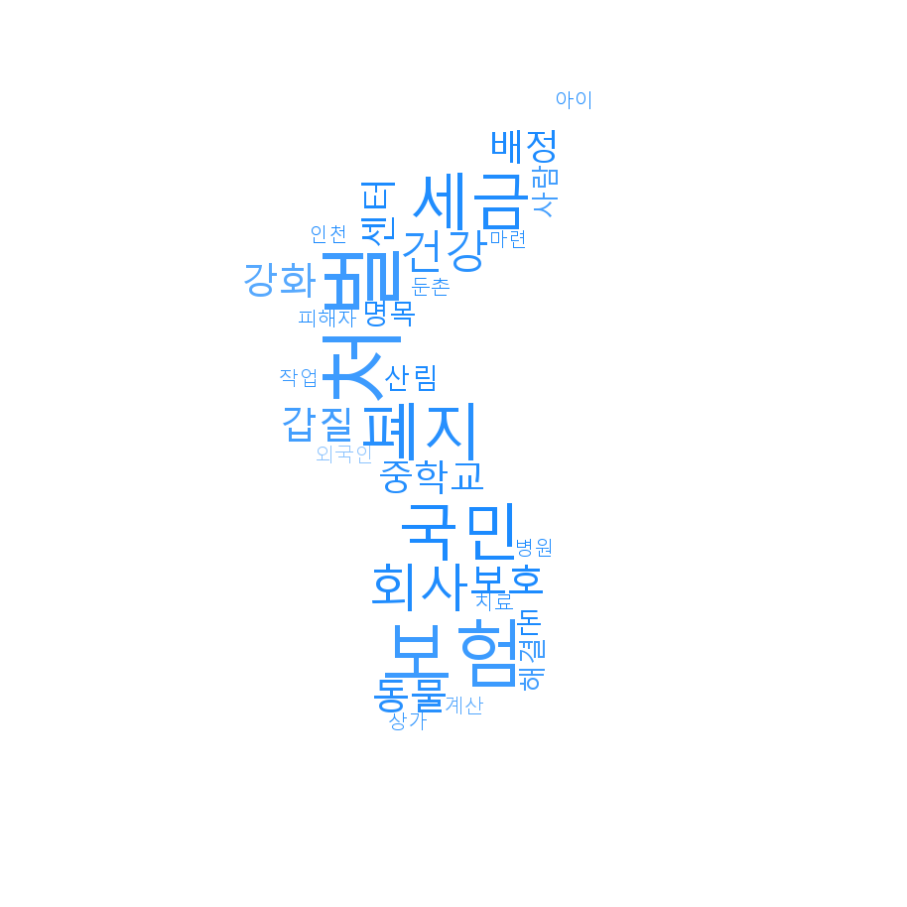

                                                     <국민청원 키워드 top 30>




※ AI가 작성한 기사 입니다.



 청와대 홈페이지에 따르면 2020년 1월 마지막 주에 청와대 국민청원 게시판에 신규 등록된 청원 수는 64건이다.
이 중 28253명의 서명을 받아 가장 많은 지지를 얻은 청원은 "국민건강보험으로 외국인들이 공짜치료or할인혜택 받는 미친 짓을 멈춰주세요..."이다.
해당 청원을 올린 국민은"6개월 이상 거주하면서 보험료만 내면 혜택을 볼 수 있다고 들었습니다. .국민을 위해 만들어진 국민건강보험을 외국인들을 싸게 치료해주는 것에 허투루 쓰이는 것을 멈춰주세요. . .. 부탁드립니다. ."(라)며 청와대의 답변을 구했다.

그 다음으로 많은 동의를 받은 청원은 14441명이 서명한 "'공수처설치' '검찰개혁' '검경수사권조정' 모두다 이루어졌습니다. 이제 남은 것은 '언론개혁'입니다. '언론에 대한 징벌적손해배상제도!!' 도입을 청원합니다. 함께 해주십시오!!"이다.
청원자는 글에서 "여러분 이제 남은 것은 '언론개혁'입니다.강력한 제도적 장치를 통해 개혁을 이루어야 합니다.악의적이고 고의적인 의도를 가지고 인권은 무시한 체, 아니면 말고라는 식의 언론을 단죄할 수 있는 것입니다."(라)며 국민의 동의를 구했다.

세 번째로 많은 동의를 얻은 글은 "국민세금으로 가는 공무원 해외연수 특례 폐지를 청원합니다"이며 청원자는 "국민의 세금으로 이루어지는 공무원의 해외 연수 문제가 많지만 아직도 유지되고 있습니다 가고 싶으면 본인 돈으로 가야 합니다.TV만 보아도, 기사만 보아도, 온라인으로 조사만 해보아도 얼마든지 알아낼 수 있는 내용들을 위해 이 시점에 국민의 혈세를 사용하여 여행을 다니다니 공무원은 국민 세금으로 여행 다니기 위해 있는 사람들이 아닙니다.이번 연수에 참여한 충남도 기초의회 의장들은 모두 이 비용을 토해내고 국민들에게 사과드려야 할 것입니다."(라)며 언급하였다. 현재 6179명

In [26]:
new_content=[]
for bot in range(len(contents)):
    new_content.append(choose_importance(contents[bot]))
news_bot(new_content)